In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('/Users/jagan/Documents/coding/projects/fraud-detection-system/data/processed/merged_ieee_cis.csv')

In [4]:
fraud_rate = data.groupby('ProductCD')['isFraud'].mean().sort_values()

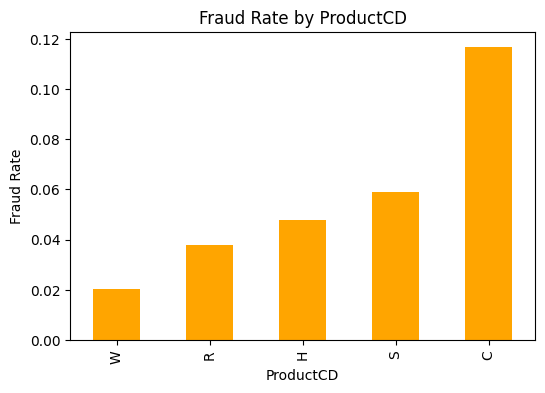

In [5]:
plt.figure(figsize=(6,4))
fraud_rate.plot(kind='bar', color='orange')
plt.title('Fraud Rate by ProductCD')
plt.ylabel('Fraud Rate')
plt.xlabel('ProductCD')
plt.show()

In [6]:
fraud_rate1 = data.groupby('DeviceType')['isFraud'].mean().sort_values()

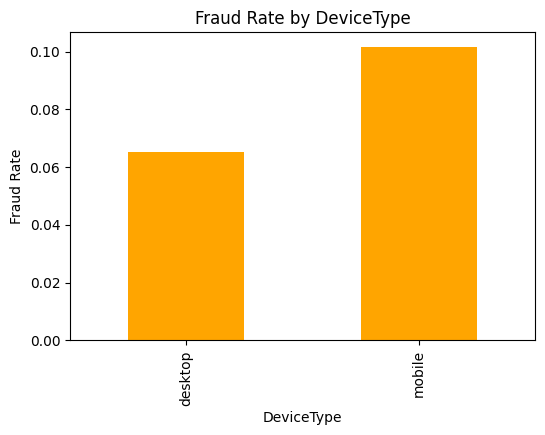

In [7]:
plt.figure(figsize=(6,4))
fraud_rate1.plot(kind='bar', color='orange')
plt.title('Fraud Rate by DeviceType')
plt.ylabel('Fraud Rate')
plt.xlabel('DeviceType')
plt.show()

In [8]:
fraud_rate2 = data.groupby('card4')['isFraud'].mean().sort_values()

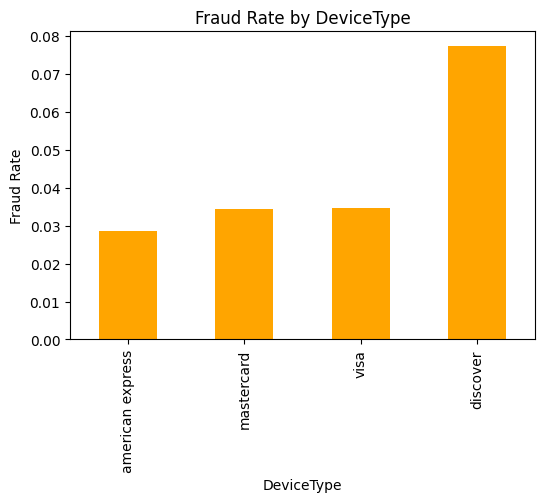

In [9]:
plt.figure(figsize=(6,4))
fraud_rate2.plot(kind='bar', color='orange')
plt.title('Fraud Rate by DeviceType')
plt.ylabel('Fraud Rate')
plt.xlabel('DeviceType')
plt.show()

In [10]:
data['DeviceInfo'].nunique()

1786

In [11]:
data['DeviceInfo'].isnull().sum()

np.int64(471874)

In [12]:
top_devices = data['DeviceInfo'].value_counts().head(10)

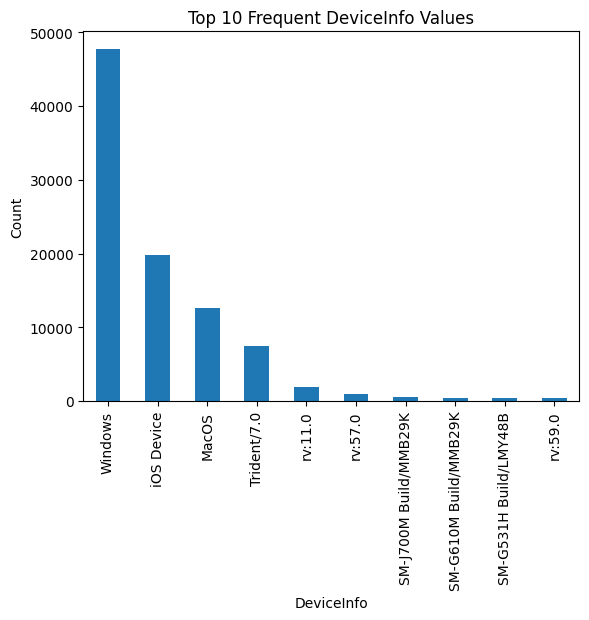

In [13]:
top_devices.plot(kind='bar')
plt.title('Top 10 Frequent DeviceInfo Values')
plt.xlabel('DeviceInfo')
plt.ylabel('Count')
plt.show()

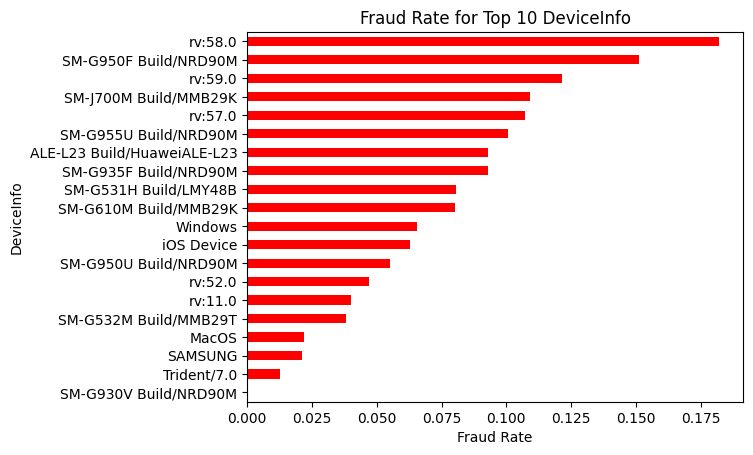

In [14]:
fraud_rate = data.groupby('DeviceInfo')['isFraud'].mean()
top_10 = data['DeviceInfo'].value_counts().head(20).index
fraud_rate_top = fraud_rate.loc[top_10].sort_values()

fraud_rate_top.plot(kind='barh', color='red')
plt.title('Fraud Rate for Top 10 DeviceInfo')
plt.xlabel('Fraud Rate')
plt.show()

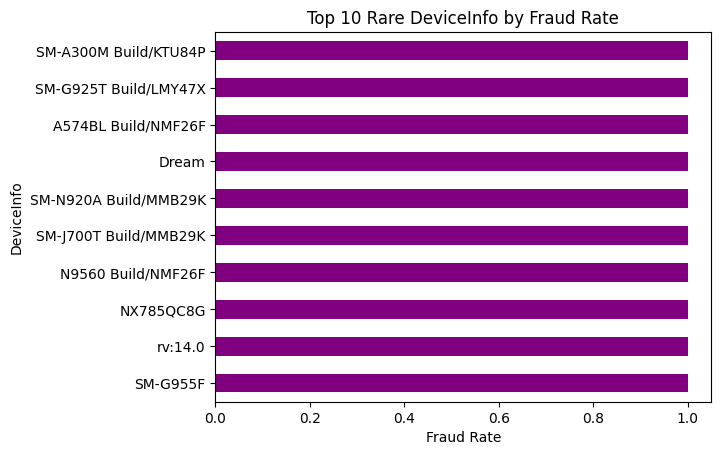

In [15]:
value_counts = data['DeviceInfo'].value_counts()
rare_devices = value_counts[value_counts < 100].index

rare_fraud_rate = fraud_rate.loc[rare_devices].sort_values(ascending=False).head(10)
rare_fraud_rate.plot(kind='barh', color='purple')
plt.title('Top 10 Rare DeviceInfo by Fraud Rate')
plt.xlabel('Fraud Rate')
plt.show()

In [16]:
data['DeviceInfo_missing'] = data['DeviceInfo'].isnull().astype(int)
missing_fraud_rate = data.groupby('DeviceInfo_missing')['isFraud'].mean()

missing_fraud_rate

DeviceInfo_missing
0    0.072531
1    0.025549
Name: isFraud, dtype: float64

In [17]:
data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,DeviceInfo_missing
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,0


In [18]:
card_fraud_rate = data.groupby('card4')['isFraud'].mean()


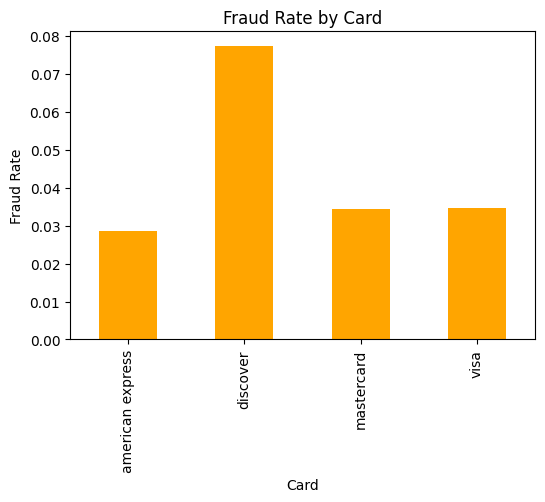

In [19]:
plt.figure(figsize=(6,4))
card_fraud_rate.plot(kind='bar', color='orange')
plt.title('Fraud Rate by Card')
plt.ylabel('Fraud Rate')
plt.xlabel('Card')
plt.show()

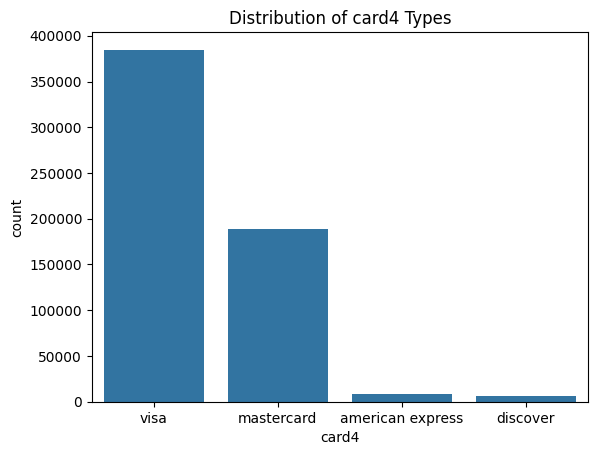

In [20]:
sns.countplot(x='card4', data=data, order=data['card4'].value_counts().index)
plt.title('Distribution of card4 Types')
plt.show()

In [21]:
data['TransactionDT'] = pd.to_timedelta(data['TransactionDT'], unit='s')

In [22]:
ref_date = pd.to_datetime('2025-01-01')

In [23]:
data['TransactionDatetime'] = ref_date + data['TransactionDT']

In [24]:
data['trans_hour'] = data['TransactionDatetime'].dt.hour
data['trans_dayofweek'] = data['TransactionDatetime'].dt.dayofweek
data['trans_day'] = data['TransactionDatetime'].dt.day

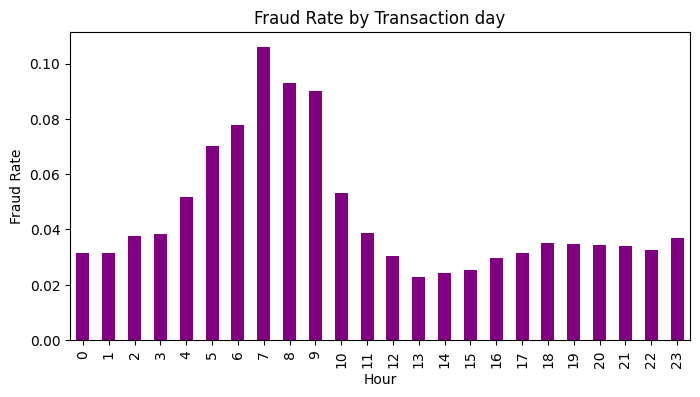

In [25]:
fraud_by_hour = data.groupby('trans_hour')['isFraud'].mean()

plt.figure(figsize=(8,4))
fraud_by_hour.plot(kind='bar', color='purple')
plt.title('Fraud Rate by Transaction day')
plt.xlabel('Hour')
plt.ylabel('Fraud Rate')
plt.show()

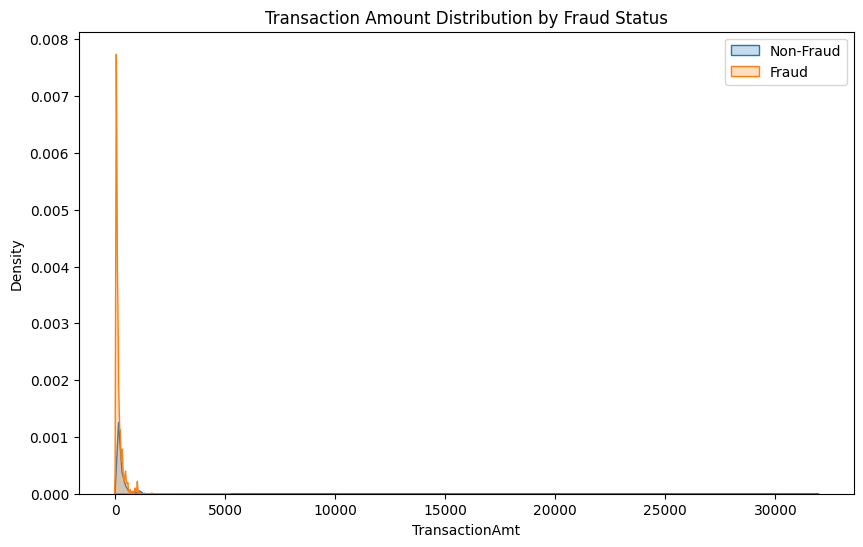

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.kdeplot(data.loc[data['isFraud'] == 0, 'TransactionAmt'], label='Non-Fraud', fill=True, bw_adjust=0.5)
sns.kdeplot(data.loc[data['isFraud'] == 1, 'TransactionAmt'], label='Fraud', fill=True, bw_adjust=0.5)
plt.title('Transaction Amount Distribution by Fraud Status')
plt.xlabel('TransactionAmt')
plt.ylabel('Density')
plt.legend()
plt.show()


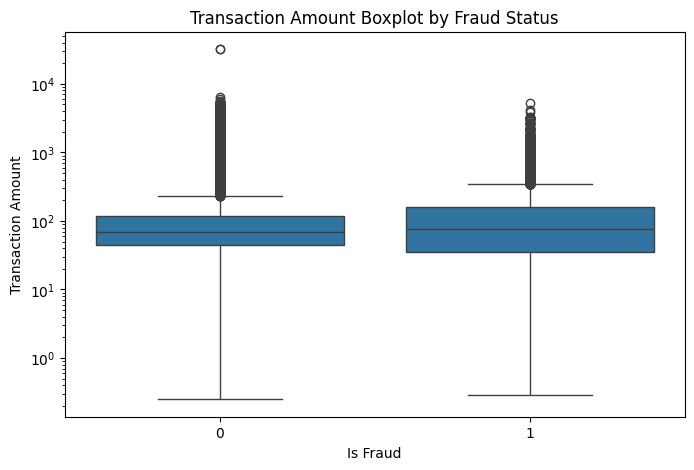

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x='isFraud', y='TransactionAmt', data=data)
plt.title('Transaction Amount Boxplot by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.yscale('log')  # Apply log scale to handle skewness
plt.show()

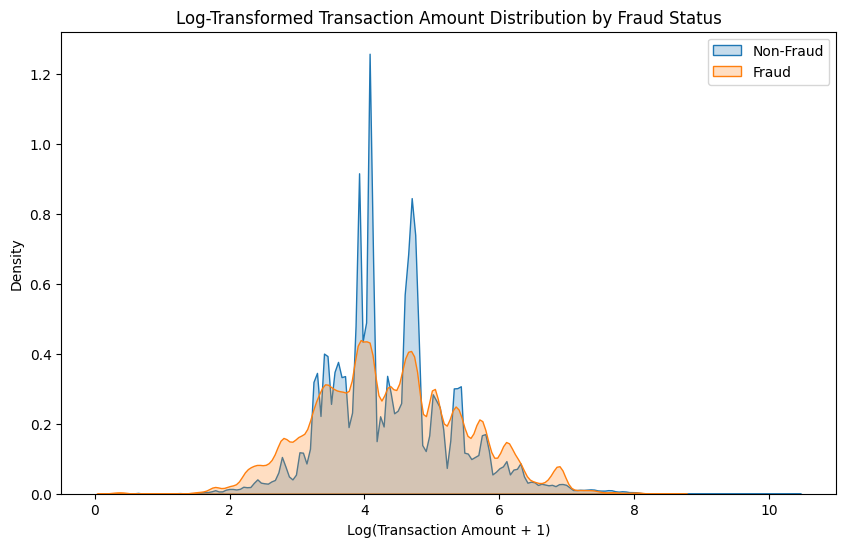

In [28]:

data['TransactionAmt_log'] = np.log1p(data['TransactionAmt'])

plt.figure(figsize=(10,6))
sns.kdeplot(data.loc[data['isFraud'] == 0, 'TransactionAmt_log'], label='Non-Fraud', fill=True, bw_adjust=0.5)
sns.kdeplot(data.loc[data['isFraud'] == 1, 'TransactionAmt_log'], label='Fraud', fill=True, bw_adjust=0.5)
plt.title('Log-Transformed Transaction Amount Distribution by Fraud Status')
plt.xlabel('Log(Transaction Amount + 1)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 440 entries, TransactionID to TransactionAmt_log
dtypes: datetime64[ns](1), float64(400), int32(3), int64(4), object(31), timedelta64[ns](1)
memory usage: 1.9+ GB


In [30]:
data.nunique()

TransactionID          590540
isFraud                     2
TransactionDT          573349
TransactionAmt          20902
ProductCD                   5
                        ...  
TransactionDatetime    573349
trans_hour                 24
trans_dayofweek             7
trans_day                  31
TransactionAmt_log      20902
Length: 440, dtype: int64

In [32]:
data['card1'].value_counts()

card1
7919     14932
9500     14162
15885    10361
17188    10344
15066     7945
         ...  
17084        1
14620        1
11440        1
13231        1
18038        1
Name: count, Length: 13553, dtype: int64

In [33]:
behavior_features = [f'C{i}' for i in range(1, 15)]
behavior_features = [f for f in behavior_features if f in data.columns]


agg_funcs = ['mean', 'max', 'min', 'std']

agg_features = data.groupby('card1')[behavior_features].agg(agg_funcs)


agg_features.columns = ['_'.join(col).strip() for col in agg_features.columns.values]
agg_features.reset_index(inplace=True)


data = data.merge(agg_features, on='card1', how='left')


In [36]:
pd.set_option('display.max_columns',None)

In [38]:
data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,DeviceInfo_missing,TransactionDatetime,trans_hour,trans_dayofweek,trans_day,TransactionAmt_log,C1_mean,C1_max,C1_min,C1_std,C2_mean,C2_max,C2_min,C2_std,C3_mean,C3_max,C3_min,C3_std,C4_mean,C4_max,C4_min,C4_std,C5_mean,C5_max,C5_min,C5_std,C6_mean,C6_max,C6_min,C6_std,C7_mean,C7_max,C7_min,C7_std,C8_mean,C8_max,C8_min,C8_std,C9_mean,C9_max,C9_min,C9_std,C10_mean,C10_max,C10_min,C10_std,C11_mean,C11_max,C11_min,C11_std,C12_mean,C12_max,C12_min,C12_std,C13_mean,C13_max,C13_min,C13_std,C14_mean,C14_max,C14_min,C14_std
0,2987000,0,1 days 00:00:00,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0